# About Dataset

Total number of classes = 14
Total number of images = 13,024

**Class Labels:** Corn___Common_Rust, Corn___Gray_Leaf_Spot, Corn___Healthy, Corn___Northern_Leaf_Blight, Potato___Early_Blight, Potato___Healthy, Potato___Late_Blight, Rice___Brown_Spot, Rice___Healthy, Rice___Leaf_Blast, Rice___Neck_Blast, Wheat___Brown_Rust, Wheat___Healthy, Wheat___Yellow_Rust.


**Corn Plant Species:**

- Common Rust (1192 images)
- Gray Leaf Spot (513 images)
- Healthy (1162 images)
- Northern Leaf Blight (985 images)
Total images: 3852 images
52,229,657 bytes
All the images of the Corn species has been collected from the PlantVillage dataset [1]. PlantVillage is a standard and most popular leaf image dataset for plant disease detection.

**Potato Plant Species:**

- Early Blight (1000 images)
- Healthy (152 images)
- Late Blight (1000 images)
- Total images: 2152 images
39,441,201 bytes
All the images of the Potato species has been collected from the PlantVillage dataset [1].

**Rice Plant Species:**

- Brown Spot (613 images)
- Healthy (1488 images)
- Leaf Blast (977 images)
- Neck Blast (1000 images)
Total images: 4078 images
2,105,364,423 bytes

Rice images were collected from the datasets:

Dhan-Shomadhan: A Dataset of Rice Leaf Disease Classification for Bangladeshi Local Rice [2].
The images from the Leaf background images of the classes Brown Spot and Rice Blast was added to the classes Rice___Brown_Spot and Rice___Leaf_Blast to increase the number of training samples. This dataset has the license CC BY 4.0 [3]. The images were not changed or edited.
"Rice Leafs" dataset from Kaggle [4].
The images of this dataset was added to the classes Rice___Brown_Spot, Rice___Healthy, and Rice___Leaf_Blast.

**Wheat Plant Species:**

- Brown Rust (902 images)
- Healthy (1116 images)
- Yellow Rust (924 images)
Total images: 2942 images
405,695,274 bytes

Wheat images were collected from the datasets:
"Wheat Disease Detection" dataset from Kaggle [5].

References:
- [1] D. P. Hughes and M. Salathe, “An open access repository of images on plant health to enable the development of mobile disease diagnostics,” 2015, [Online]. Available: http://arxiv.org/abs/1511.08060.
- [2] Hossain, Md Fahad; Abujar , Sheikh ; Noori, Sheak Rashed Haider ; Hossain, Syed Akhter (2021), “Dhan-Shomadhan: A Dataset of Rice Leaf Disease Classification for Bangladeshi Local Rice”, Mendeley Data, V1, doi: 10.17632/znsxdctwtt.1
- [3] "Creative Commons — Attribution 4.0 International — CC BY 4.0", Creativecommons.org, 2022. [Online]. Available: https://creativecommons.org/licenses/by/4.0/. [Accessed: 11- Jun- 2022]
- [4] S. RIYAZ, "Rice Leafs", Kaggle.com, 2022. [Online]. Available: https://www.kaggle.com/datasets/shayanriyaz/riceleafs. [Accessed: 11- Jun- 2022]
- [5] S. DUNK, "Wheat Disease Detection", Kaggle.com, 2022. [Online]. Available: https://www.kaggle.com/datasets/sinadunk23/behzad-safari-jalal. - [Accessed: 11- Jun- 2022]

# Data Processing

In [ ]:
!pip install opendatasets

import opendatasets as op

op.download("https://www.kaggle.com/datasets/nafishamoin/new-bangladeshi-crop-disease/data")

# asifhassan2002

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asifhassan2002
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nafishamoin/new-bangladeshi-crop-disease


100%|██████████| 2.35G/2.35G [00:40<00:00, 62.5MB/s]


## Constent

In [1]:
IMAGE_SIZE = 224
BATCH_SIZE = 16
BASE_PATH = "/kaggle/input/new-bangladeshi-crop-disease/BangladeshiCrops/BangladeshiCrops/Crop___Disease"

In [ ]:
%cd /content/new-bangladeshi-crop-disease/BangladeshiCrops/BangladeshiCrops/Crop___Disease/new-bangladeshi-crop-disease/BangladeshiCrops/BangladeshiCrops/Crop___Disease

/content/new-bangladeshi-crop-disease/BangladeshiCrops/BangladeshiCrops/Crop___Disease/new-bangladeshi-crop-disease/BangladeshiCrops/BangladeshiCrops/Crop___Disease


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import json
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def get_image_and_labels(paths, img_size):
    images_path = []
    class_names = []


    for main_path in os.listdir(paths):
        label_path = os.path.join(BASE_PATH, main_path)

        for label in os.listdir(label_path):
            img_path = os.path.join(label_path, label)

            for image in os.listdir(img_path):
                img = (os.path.join(img_path, image))
                images_path.append(img)
                class_names.append(label)

    return images_path, class_names



In [4]:
images_path, class_names = get_image_and_labels(BASE_PATH, IMAGE_SIZE)

label_dict = {class_name: i for i, class_name in enumerate(sorted(set(class_names)))}

inv_label_dict = {v: k for k, v in label_dict.items()}

labels = [label_dict[class_name] for class_name in class_names]

print(f"Number of images: {len(images_path)}")
print(f'Number of labels: {len(labels)}')
print(f'Number of classes: {len(label_dict)}')
print(f'Class names: {label_dict}')

Number of images: 13024
Number of labels: 13024
Number of classes: 14
Class names: {'Corn___Common_Rust': 0, 'Corn___Gray_Leaf_Spot': 1, 'Corn___Healthy': 2, 'Corn___Northern_Leaf_Blight': 3, 'Potato___Early_Blight': 4, 'Potato___Healthy': 5, 'Potato___Late_Blight': 6, 'Rice___Brown_Spot': 7, 'Rice___Healthy': 8, 'Rice___Leaf_Blast': 9, 'Rice___Neck_Blast': 10, 'Wheat___Brown_Rust': 11, 'Wheat___Healthy': 12, 'Wheat___Yellow_Rust': 13}


In [ ]:
'''# Data to save
data_to_save = {
    "class_names": class_names,
    "label_dictionary": label_dict,
    "labels": labels,
    "images": images_path
}

# Save to a JSON file
output_file = "/content/classification_data.json"
with open(output_file, "w") as json_file:
    json.dump(data_to_save, json_file)

print(f"Data saved successfully to {output_file}")'''

In [6]:
# Function for processing image
def process_image(image_path):

    images = []
    for image in image_path:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        images.append(img)

    return np.array(images)

images = process_image(images_path)
labels = np.array(labels)

print(f'shape of images: {images.shape}')
print(f'shape of labels: {labels.shape}')

shape of images: (13024, 224, 224, 3)
shape of labels: (13024,)


# EDA

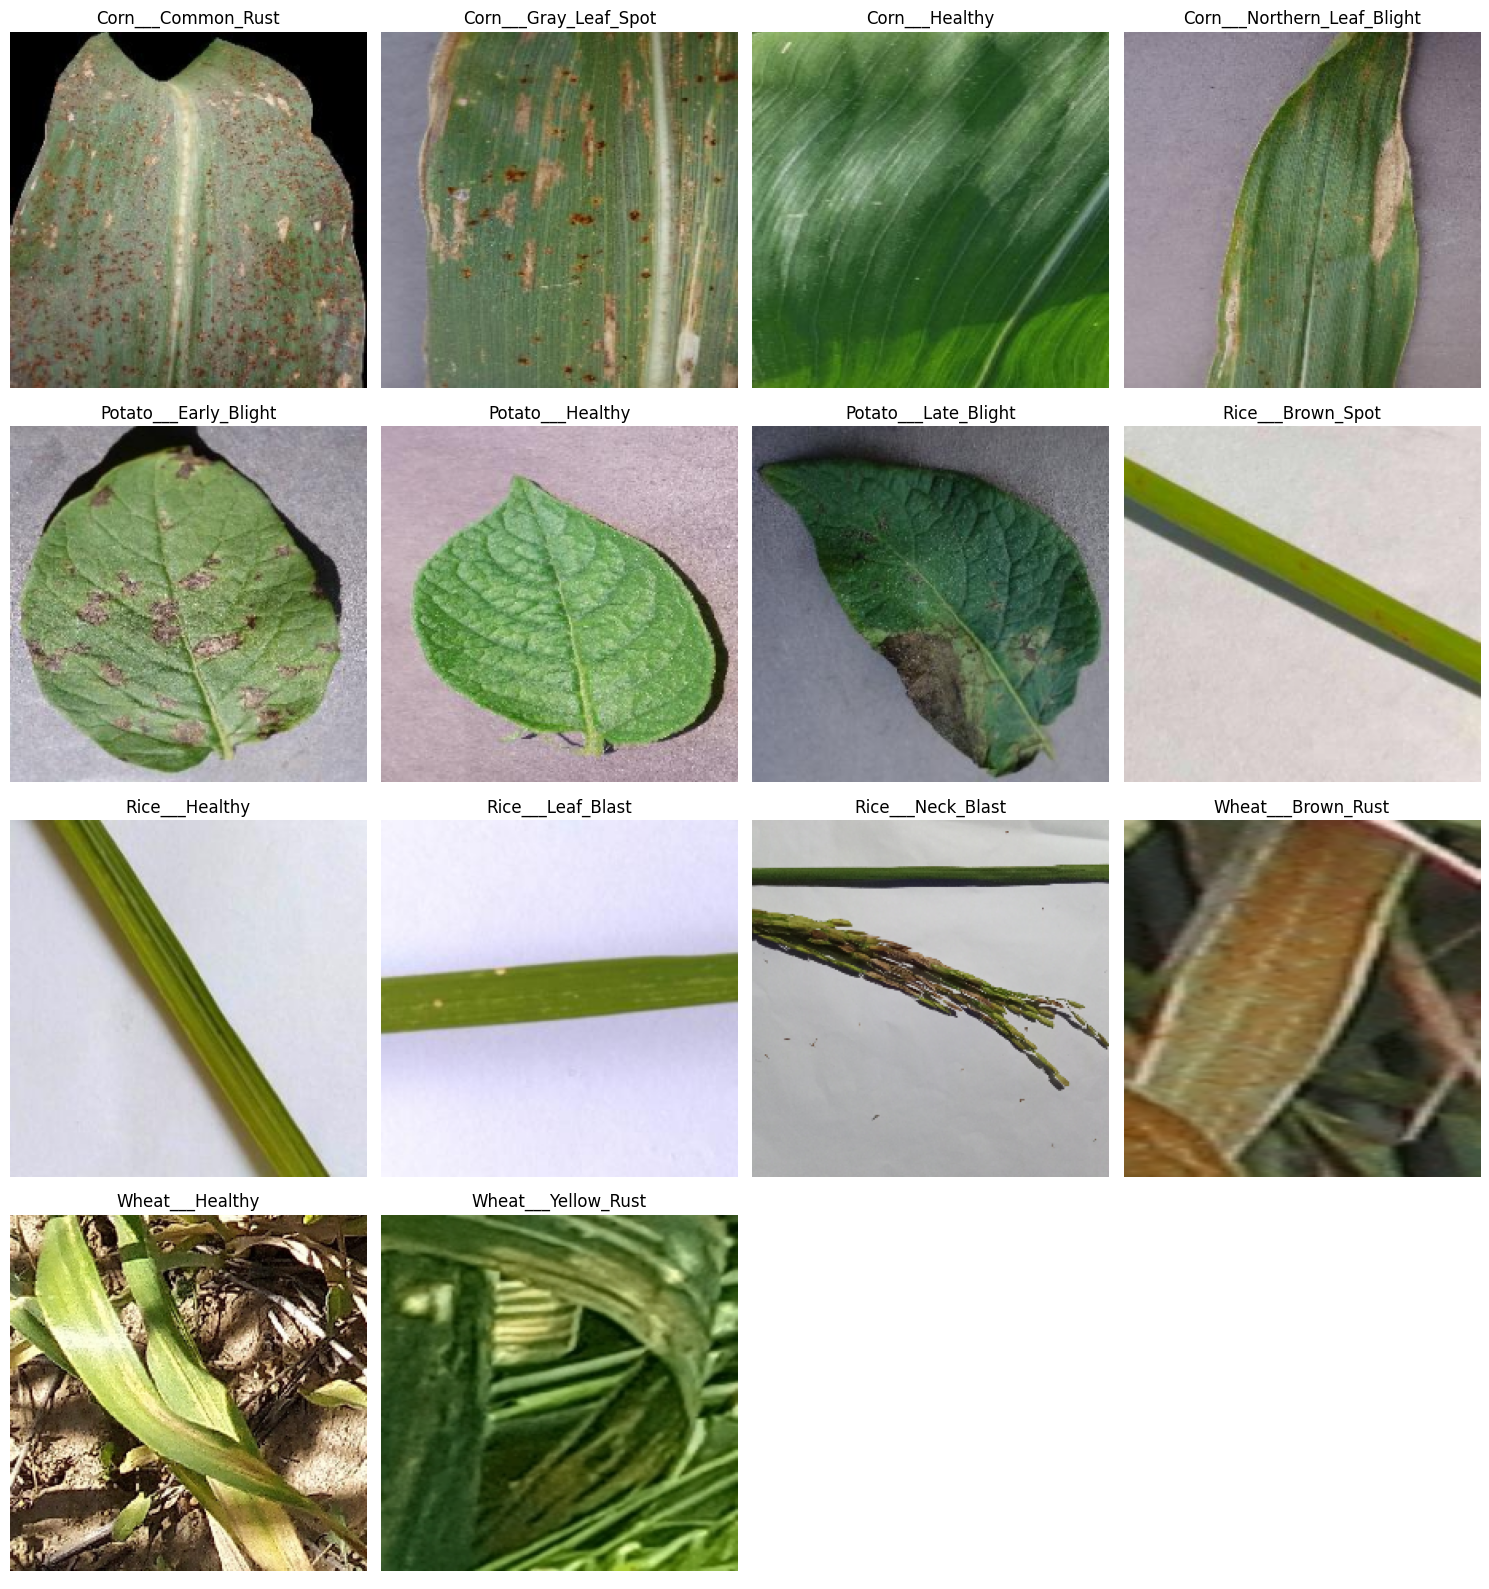

In [7]:
import random

num_classes = len(inv_label_dict)
cols = 4
rows = (num_classes + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i in range(num_classes):
    class_indices = np.where(labels == i)[0]
    if len(class_indices) > 0:
      random_index = random.choice(class_indices)
      axes[i].imshow(images[random_index])
      axes[i].set_title(inv_label_dict[i])
      axes[i].axis('off')
    else:
      axes[i].axis('off')


for j in range(i+1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

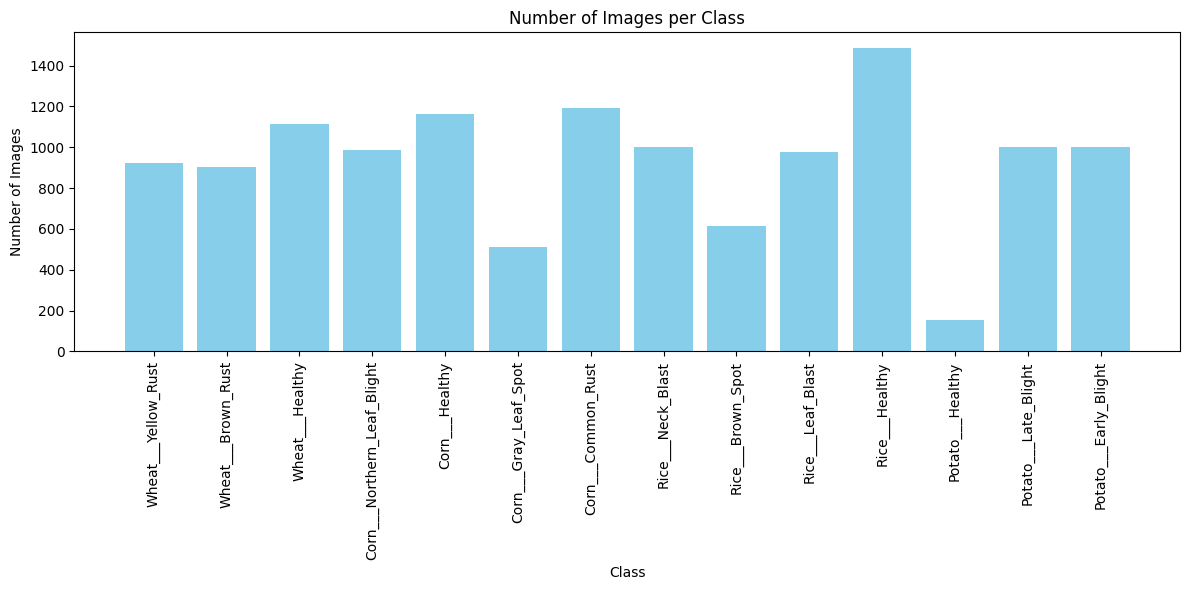

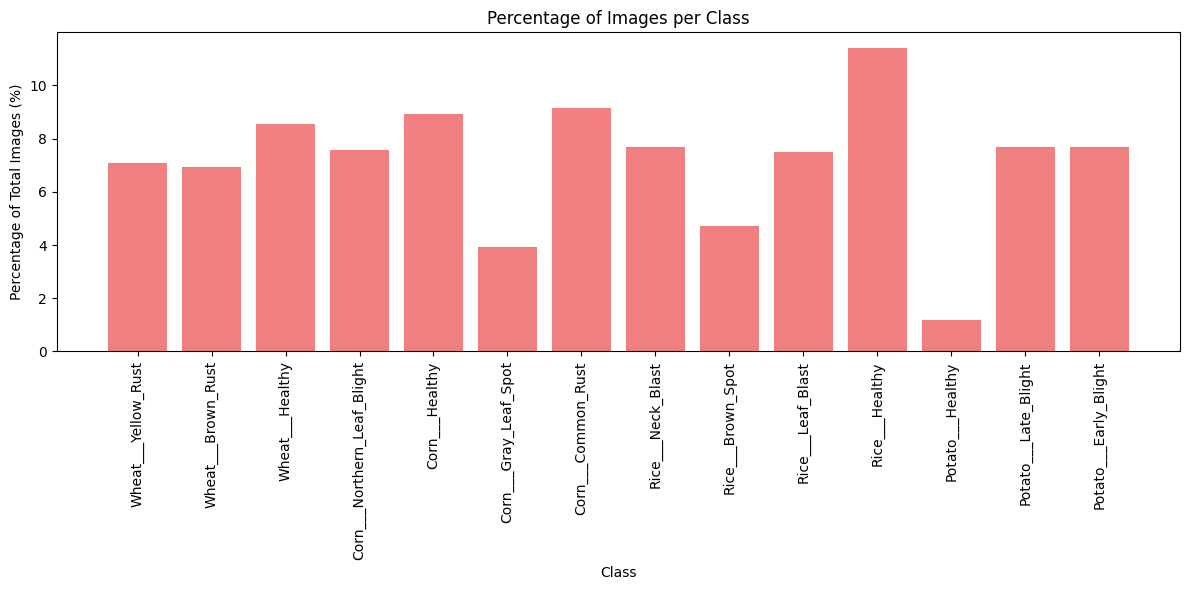

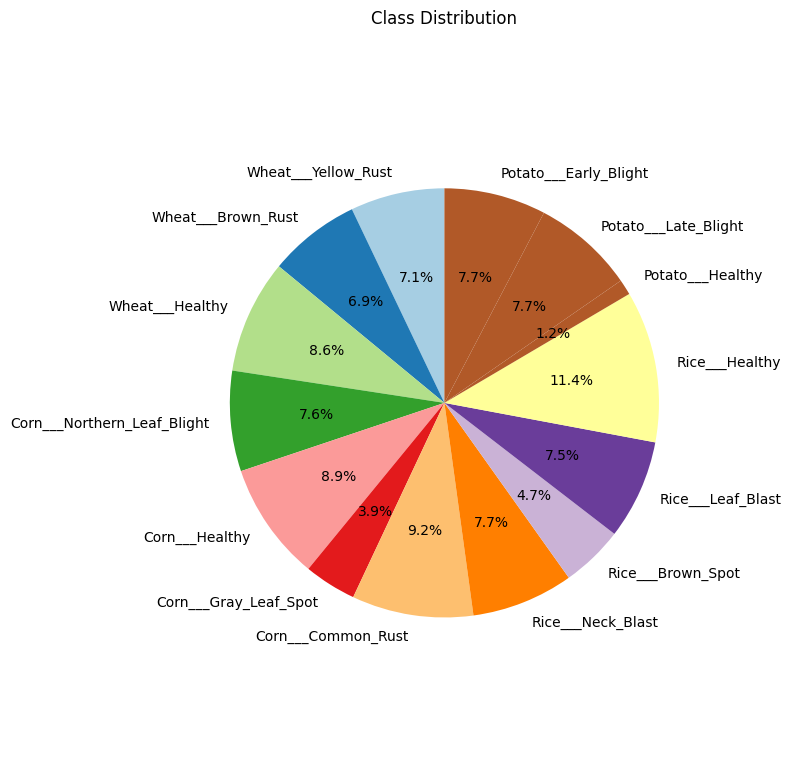

In [8]:

import matplotlib.pyplot as plt

class_counts = {}
for label in labels:
    class_name = inv_label_dict[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

class_names = list(class_counts.keys())
class_amounts = list(class_counts.values())
total_images = len(labels)
percentages = [(amount / total_images) * 100 for amount in class_amounts]

# Bar plot for class amounts
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_amounts, color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Bar plot for percentages
plt.figure(figsize=(12, 6))
plt.bar(class_names, percentages, color='lightcoral')
plt.xlabel("Class")
plt.ylabel("Percentage of Total Images (%)")
plt.title("Percentage of Images per Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_amounts, labels=class_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(class_names))))
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Custom Preprocessing Setting

In [9]:
print(class_counts)

# Potato___Healthy, Corn___Gray_Leaf_Spot , Rice___Brown_Spot are less

Potato___Healthy = [img for i, img in enumerate(images) if labels[i] == label_dict["Potato___Healthy"]]
Corn___Gray_Leaf_Spot = [img for i, img in enumerate(images) if labels[i] == label_dict["Corn___Gray_Leaf_Spot"]]
Rice___Brown_Spot = [img for i, img in enumerate(images) if labels[i] == label_dict["Rice___Brown_Spot"]]

print(f"Number of Potato___Healthy images: {len(Potato___Healthy)}, label: {label_dict['Potato___Healthy']}")
print(f"Number of Corn___Gray_Leaf_Spot images: {len(Corn___Gray_Leaf_Spot)},label: {label_dict['Corn___Gray_Leaf_Spot']}")
print(f"Number of Rice___Brown_Spot images: {len(Rice___Brown_Spot)}, label: {label_dict['Rice___Brown_Spot']}")


{'Wheat___Yellow_Rust': 924, 'Wheat___Brown_Rust': 902, 'Wheat___Healthy': 1116, 'Corn___Northern_Leaf_Blight': 985, 'Corn___Healthy': 1162, 'Corn___Gray_Leaf_Spot': 513, 'Corn___Common_Rust': 1192, 'Rice___Neck_Blast': 1000, 'Rice___Brown_Spot': 613, 'Rice___Leaf_Blast': 977, 'Rice___Healthy': 1488, 'Potato___Healthy': 152, 'Potato___Late_Blight': 1000, 'Potato___Early_Blight': 1000}
Number of Potato___Healthy images: 152, label: 5
Number of Corn___Gray_Leaf_Spot images: 513,label: 1
Number of Rice___Brown_Spot images: 613, label: 7


In [10]:
def custom_preprocessing(image):
    # Apply noise to the image
    noisy_image = add_noise_to_image(image)

    # Apply blur to the image
    blurred_image = apply_blur_to_image(noisy_image)

    # Adjust contrast and brightness
    enhanced_image = adjust_contrast_brightness(blurred_image)

    return enhanced_image

def add_noise_to_image(image):
    # Add noise to the image (customize this function as needed)
    noisy_image = np.clip(image + np.random.normal(loc=0, scale=0.1, size=image.shape), 0, 1)
    return noisy_image

def apply_blur_to_image(image):
    # Apply blur to the image (customize this function as needed)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

def adjust_contrast_brightness(image):
    # Adjust contrast and brightness (customize as needed)
    img = (image * 255).astype(np.uint8)  # Convert image to uint8 for PIL
    pil_img = Image.fromarray(img)

    enhancer = ImageEnhance.Contrast(pil_img)
    enhanced_img = enhancer.enhance(1.5)  # Increase contrast by a factor of 1.5

    enhancer = ImageEnhance.Brightness(enhanced_img)
    enhanced_img = enhancer.enhance(1.2)  # Increase brightness by a factor of 1.2
    enhanced_img = np.array(enhanced_img) / 255.0

    return enhanced_img

# Splitting the Data to Test and Train and Augmentating the Data

In [11]:
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

In [12]:
n_samples , n_heignt, n_width, n_channles = images.shape
X_flat = images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=0.2,
                                                    random_state=42,stratify=labels)

X_train = X_train.reshape((X_train.shape[0], n_heignt, n_width, n_channles))
X_test = X_test.reshape((X_test.shape[0], n_heignt, n_width, n_channles))

print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')

shape of X_train: (10419, 224, 224, 3)
shape of X_test: (2605, 224, 224, 3)


In [13]:
#Applying different augmentation settings to minority classes:

augmentation_class1 = ImageDataGenerator(
    rotation_range=10,  # Rotate slightly to mimic camera angle variations
    width_shift_range=0.1,  # Simulate slight horizontal movement
    height_shift_range=0.1,  # Simulate slight vertical movement
    zoom_range=0.1,  # Slight zoom to mimic camera zoom variations
    horizontal_flip=True,  # Simulate flipping due to leaf orientation
    vertical_flip=False,  # Vertical flipping is rare in natural settings
    brightness_range=[0.8, 1.2],  # Simulate lighting variations
)

augmentation_class2 = ImageDataGenerator(
    rotation_range=20,  # Allow larger rotations for variability
    width_shift_range=0.2,  # Simulate more significant horizontal movement
    height_shift_range=0.2,  # Simulate more significant vertical movement
    zoom_range=0.2,  # Allow more significant zoom
    horizontal_flip=True,  # Include flipping for symmetry variations
    vertical_flip=True,  # Include vertical flipping for broader augmentation
    brightness_range=[0.7, 1.3],  # More lighting variation
)

augmentation_class3 = ImageDataGenerator(
    rotation_range=15,  # Moderate rotation for natural leaf positions
    width_shift_range=0.15,  # Moderate horizontal movement
    height_shift_range=0.15,  # Moderate vertical movement
    zoom_range=0.15,  # Moderate zoom for size variations
    horizontal_flip=True,  # Simulate natural horizontal flips
    vertical_flip=False,  # Avoid unrealistic vertical flips
    shear_range=0.2,  # Simulate perspective changes due to uneven surfaces
    brightness_range=[0.9, 1.1],  # Slight lighting variations
)

#General Augmentation:
datagen = ImageDataGenerator(
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in missing pixels using the nearest available
)

datagen.fit(X_train)

augmented_images = []
augmented_labels = []

# Number of times to augment the data (in this case, we'll double the dataset)
augmentation_factor = 1
target_augmentation_factor = 2

for x, y in datagen.flow(X_train, y_train, batch_size=len(X_train),shuffle = False):
    augmented_images.extend(x)
    augmented_labels.extend(y)

    if len(augmented_images) >= augmentation_factor:
        break

# Concatenate the augmented data batches
X_train = np.array(augmented_images)
y_train = np.array(augmented_labels)

# Verify the shape of augmented data
print("Shape of augmented images:", X_train.shape)
print("Shape of augmented labels:", y_train.shape)


def apply_augmentation(X_train, y_train):
    for _ in range(target_augmentation_factor):
        if y_train == 5:
            return augmentation_class1.random_transform(X_train), y_train
        if y_train == 1:
            return augmentation_class2.random_transform(X_train), y_train
        if y_train == 7:
            return augmentation_class3.random_transform(X_train), y_train
        else:
            return X_train, y_train

Shape of augmented images: (10419, 224, 224, 3)
Shape of augmented labels: (10419,)


# Defning and Training the Model

In [14]:
y_train.shape

(10419,)

In [17]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
import numpy as np
import tensorflow as tf
'''
# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Create a dictionary of class weights
class_weight = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weight)
'''

# Model Input shape
INPUT_SHAPE = (224, 224, 3)
inp = layers.Input(shape=INPUT_SHAPE)

# Initialize the model
model = models.Sequential()

# Load the pre-trained ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=INPUT_SHAPE,
    pooling='max',
    classes = 14,
    weights='imagenet'
)

# Add the pre-trained model to the sequential model
model.add(pretrained_model)
model.add(Dropout(0.5))  # Dropout layer
model.add(Flatten())  # Flatten layer to feed into fully connected layers
model.add(Dense(512, activation='relu'))  # Fully connected layer
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer again
model.add(Dense(14, activation='softmax'))  # Output layer with dynamic number of classes

# Freeze the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Unfreeze the last few layers for fine-tuning
for layer in pretrained_model.layers[-12:]:
    layer.trainable = True

# Compile the model with the Adam optimizer
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           7,182 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,646,030 (94.02 MB)

 Trainable params: 5,522,958 (21.07 MB)

 Non-trainable params: 19,123,072 (72.95 MB)

None


In [18]:
y_train = to_categorical(y_train, num_classes= num_classes)
y_test = to_categorical(y_test, num_classes= num_classes)


checkpoint_path = 'classification.weights.h5'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=True)

#Fit the model
history = model.fit(     X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 50,
                         #validation_split = 0.1,
                         validation_data=(X_test, y_test),
                         shuffle = True,
                         #class_weight= class_weight,
                         callbacks=[checkpoint]
                         #callbacks=[reduce_lr]
                     )

Epoch 1/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6901 - loss: 1.0098
Epoch 1: val_accuracy improved from -inf to 0.89060, saving model to classification.weights.h5
326/326 ━━━━━━━━━━━━━━━━━━━━ 68s 155ms/step - accuracy: 0.6905 - loss: 1.0086 - val_accuracy: 0.8906 - val_loss: 0.3039
Epoch 2/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8891 - loss: 0.3112
Epoch 2: val_accuracy improved from 0.89060 to 0.92284, saving model to classification.weights.h5
326/326 ━━━━━━━━━━━━━━━━━━━━ 38s 116ms/step - accuracy: 0.8891 - loss: 0.3112 - val_accuracy: 0.9228 - val_loss: 0.2014
Epoch 3/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9135 - loss: 0.2244
Epoch 3: val_accuracy did not improve from 0.92284
326/326 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.9135 - loss: 0.2244 - val_accuracy: 0.9205 - val_loss: 0.2215
Epoch 4/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9280 - loss: 0.1927
Epoch 4: val_accuracy did not improve from 0.92

In [19]:
model.load_weights(checkpoint_path)

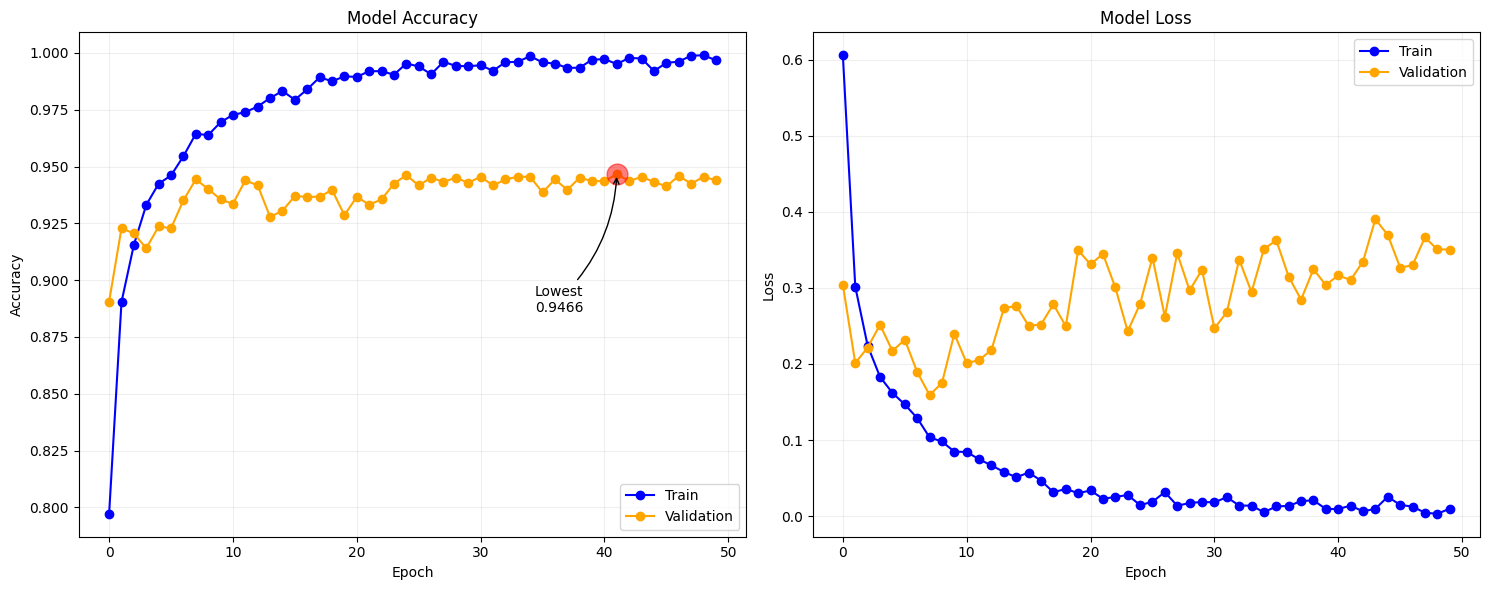

In [20]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plotting training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'], marker='o', linestyle='-', color='blue')
ax[0].plot(history.history['val_accuracy'], marker='o', linestyle='-', color='orange')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='lower right')
ax[0].grid(alpha=0.2)

# Plotting training and validation loss over epochs
ax[1].plot(history.history['loss'], marker='o', linestyle='-', color='blue')
ax[1].plot(history.history['val_loss'], marker='o', linestyle='-', color='orange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')
ax[1].grid(alpha=0.2)

# Highlight lowest validation accuracy
min_val_acc_epoch = np.argmax(history.history['val_accuracy'])
min_val_acc = np.max(history.history['val_accuracy'])
ax[0].plot(min_val_acc_epoch, min_val_acc, 'ro', markersize=15, alpha=0.5)
ax[0].annotate(f'Lowest\n{min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc),

xytext=(min_val_acc_epoch - 100, min_val_acc - 100), textcoords='offset points',
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()


# Evaluation

In [ ]:
actual_labels = []
predicted_labels = []

for img, label in zip(X_test, y_test):  
    actual_labels.append(np.argmax(label))  
    preds = model.predict(img.reshape((1, 224, 224, 3))) 
    predicted_labels.append(np.argmax(preds))  

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

                             precision    recall  f1-score   support

         Corn___Common_Rust       1.00      1.00      1.00       239
      Corn___Gray_Leaf_Spot       0.88      0.96      0.92       103
             Corn___Healthy       1.00      1.00      1.00       232
Corn___Northern_Leaf_Blight       0.98      0.94      0.96       197
      Potato___Early_Blight       1.00      0.99      1.00       200
           Potato___Healthy       1.00      0.83      0.91        30
       Potato___Late_Blight       0.97      1.00      0.99       200
          Rice___Brown_Spot       0.85      0.74      0.79       123
             Rice___Healthy       0.82      0.91      0.86       298
          Rice___Leaf_Blast       0.79      0.74      0.76       195
          Rice___Neck_Blast       1.00      1.00      1.00       200
         Wheat___Brown_Rust       0.99      0.98      0.99       180
            Wheat___Healthy       0.99      1.00      0.99       223
        Wheat___Yellow_Rust      

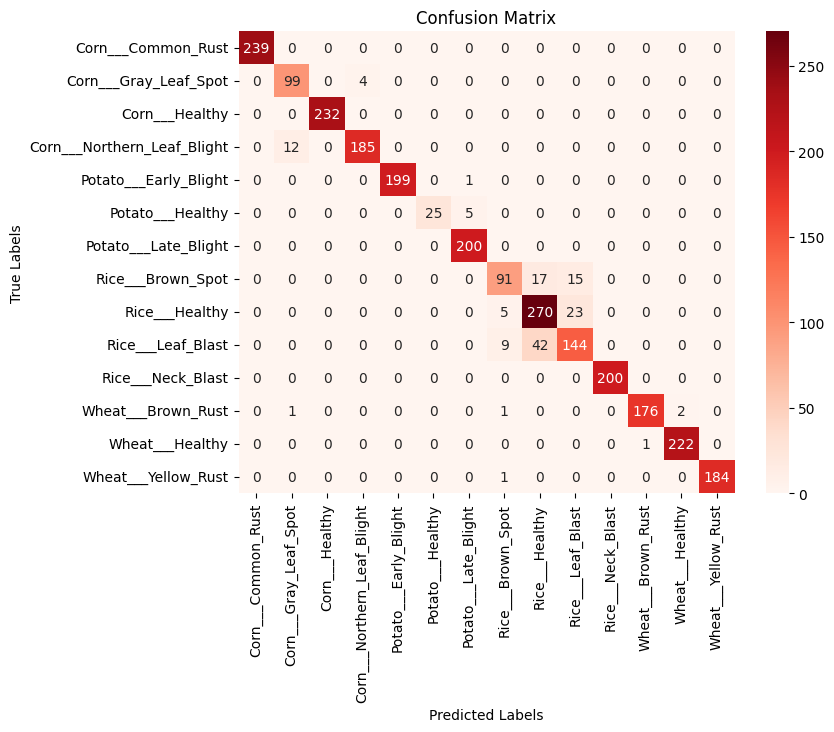

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class_names = list(label_dict.keys())
cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show

print(classification_report(actual_labels, predicted_labels, target_names= class_names))

In [34]:
def viewing_predicted_img(model, x_test, y_test, num_img):
    
    num_cols = 3  
    num_rows = (num_img + num_cols - 1) // num_cols  # Calculate rows dynamically based on columns
    
    # Dynamically adjust figure size
    plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Adjust the multiplier for spacing
    
    for i in range(num_img):
        plt.subplot(num_rows, num_cols, i + 1)
        random_num = np.random.randint(len(x_test))
        
        actual_label = np.argmax(y_test[random_num])
        pred = model.predict(x_test[random_num].reshape(1, 224, 224, 3))
        predicted_label = np.argmax(pred)
        
        plt.imshow(x_test[random_num])
        plt.title(f"Actual: {inv_label_dict[actual_label]}\nPredicted: {inv_label_dict[predicted_label]}")
        plt.axis('off')
    
    # Show all the plots
    plt.tight_layout() 
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


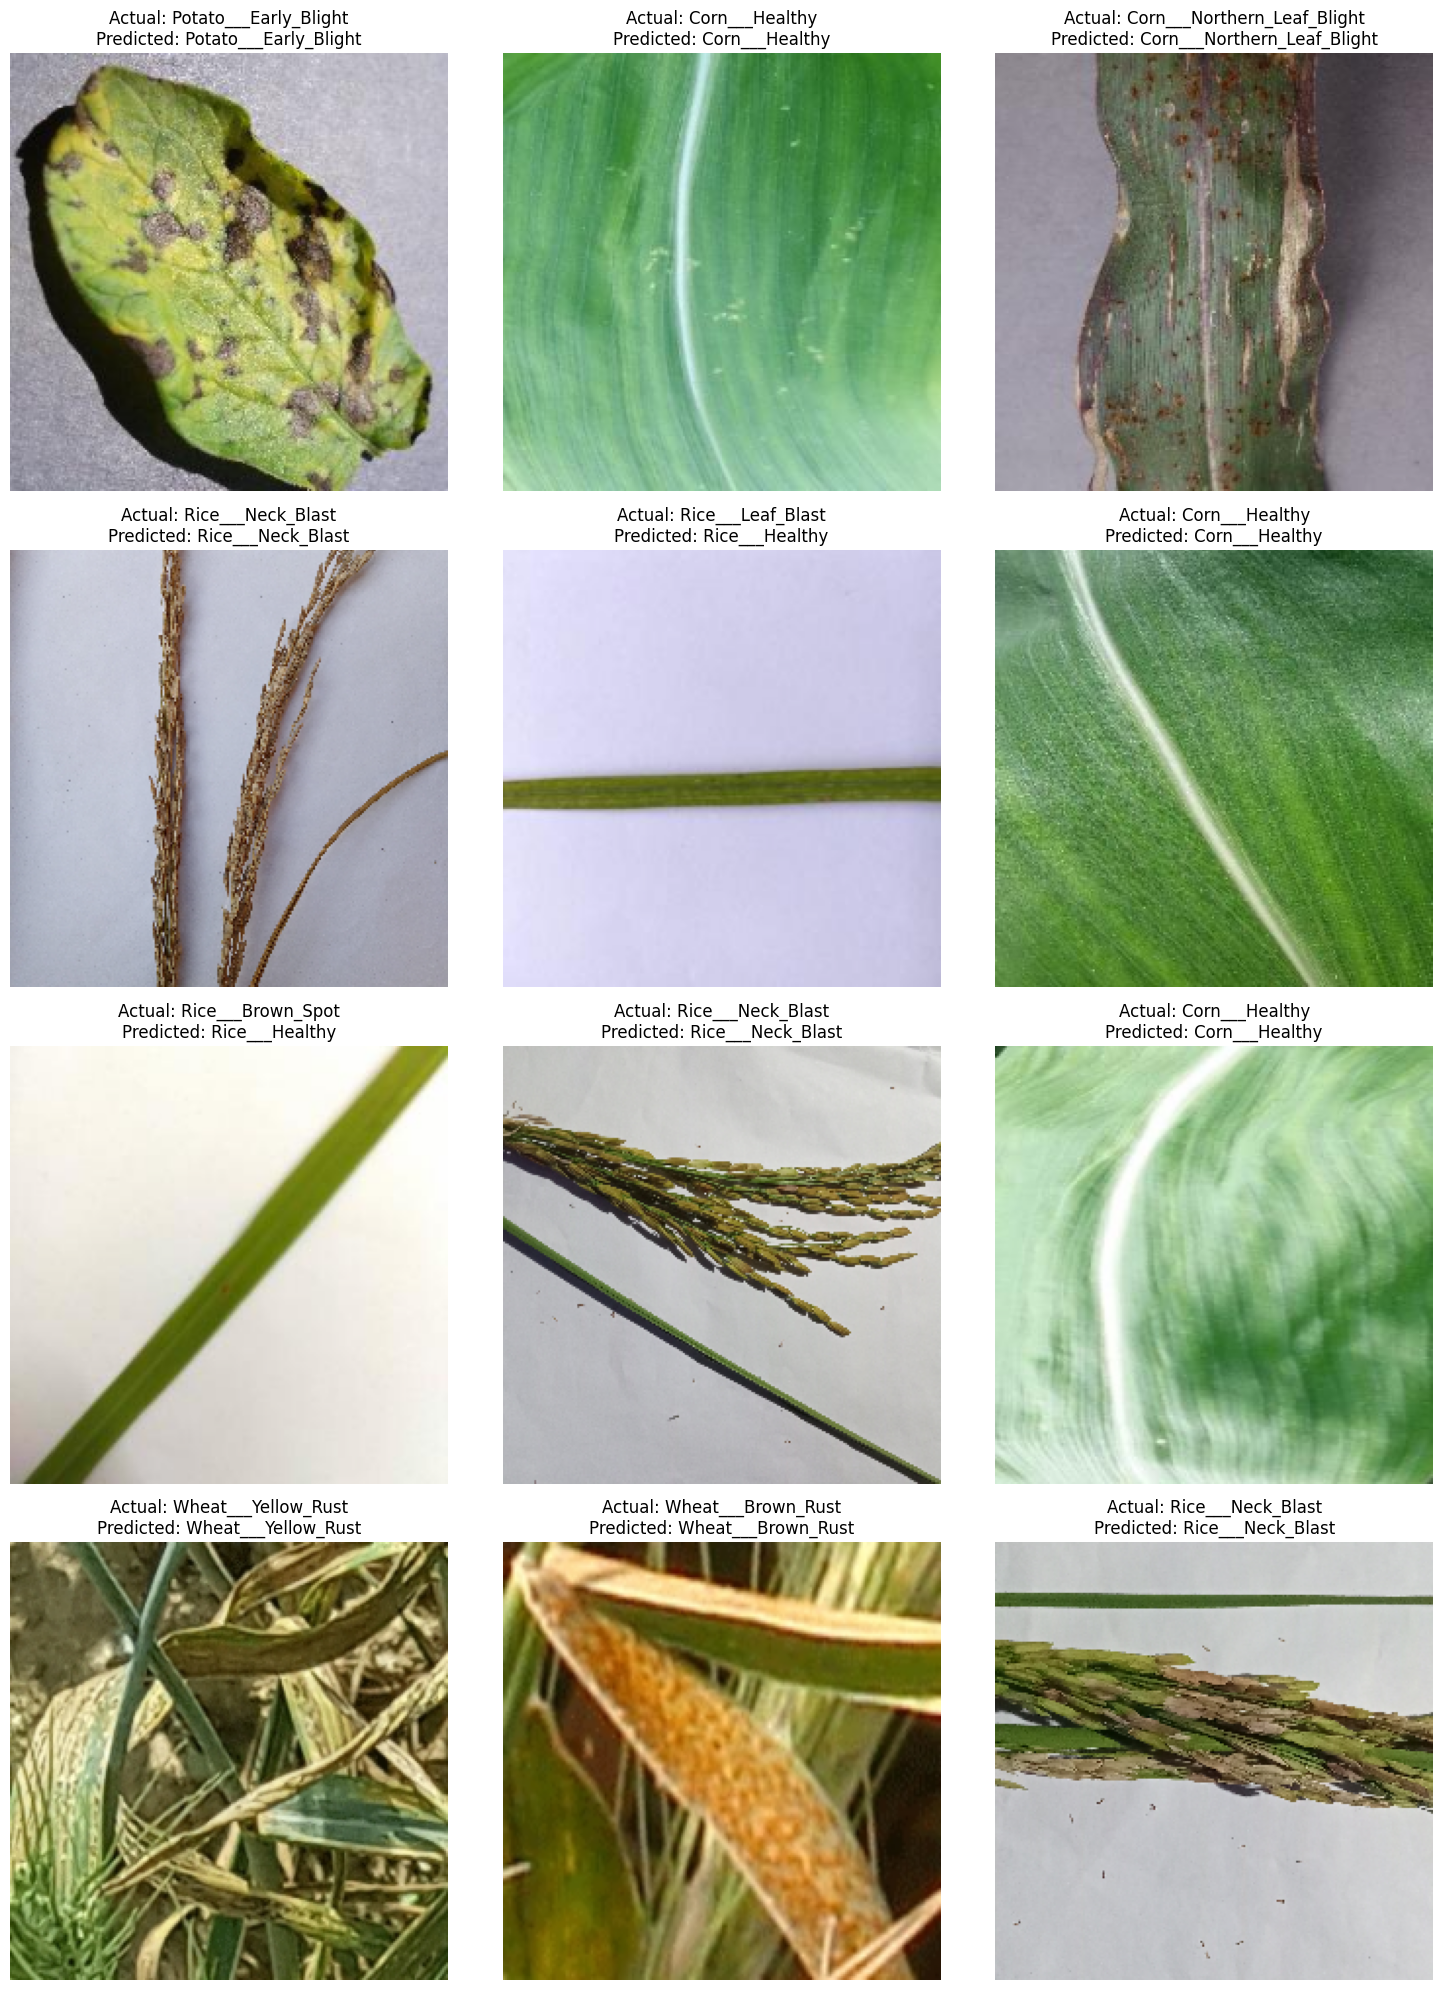

In [36]:
viewing_predicted_img(model, X_test ,y_test,12)